In [46]:
# load all the required libraries/packages

import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame

In [47]:
# generating random datasets
centers = [[4,4],[2,-2],[-1,3]]
X,y = make_blobs(n_samples =1500,centers = centers,cluster_std =0.5,random_state = 0)
# remove mean values and scale to one unit variance
X = StandardScaler().fit_transform(X)

In [48]:
X,y.shape

(array([[ 0.57149042, -1.52352591],
        [-1.05523383,  0.4928966 ],
        [ 0.27555993, -1.3221209 ],
        ...,
        [ 0.89723584,  0.79973404],
        [ 0.15771576, -1.55298374],
        [ 1.10525575,  0.95990212]]),
 (1500,))

In [49]:
# fit the data onto the DBSCAN algorithm

epsilon = 0.4
minimumSamples = 5

db = DBSCAN(eps=epsilon,min_samples=minimumSamples).fit(X)
labels =db.labels_
labels

array([0, 1, 0, ..., 2, 0, 2], dtype=int64)

In [50]:
core_sample_mask = np.zeros_like(labels,dtype=bool)
core_sample_mask[db.core_sample_indices_]=True
core_sample_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [51]:
#finding number of clusters and ignoring noise if present
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

3

In [52]:
#removing repitition

unique_values = set(labels)
unique_values

{0, 1, 2}

In [53]:
#Visualize the data, with labels =clusters

def clusters(X,labels):
    df = DataFrame(dict(x=X[:,0],y=X[:,1],label=labels))
    colors ={-1:'red',0:'blue',1:'orange',2:'green'}
    fig,ax = plt.subplots(figsize=(6,6))
    grouped = df.groupby('label')
    for key,group in grouped:
        group.plot(ax=ax,kind = 'scatter',x = 'x',y='y', label=key, color=colors[key])
    plt.xlabel('A')
    plt.ylabel('B')
    plt.show()
        
        

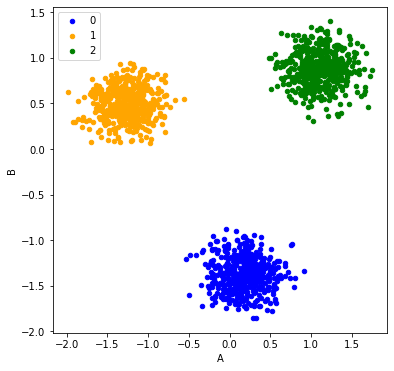

In [54]:
clusters(X,labels)

In [68]:
df = DataFrame(dict(x=X[:,0],y=X[:,1],label=labels))
df

,x,y,label
0,0.571490,-1.523526,0
1,-1.055234,0.492897,1
2,0.275560,-1.322121,0
3,1.223044,0.937946,2
4,1.217791,1.198065,2
...,...,...,...
1495,0.957822,0.781537,2
1496,1.103464,1.326658,2
1497,0.897236,0.799734,2
1498,0.157716,-1.552984,0


In [56]:
grouped = df.groupby('label')
grouped